In [3]:
pip install missingno wordcloud seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
pip install geopandas matplotlib seaborn pandas


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geodatasets


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("updated_food_inspection_cleaned.csv")

# Check the number of null values in each column
null_values = df.isnull().sum()

# Print the result
print("Number of null values in each column:")
print(null_values)


Number of null values in each column:
Inspection ID      0
DBA Name           0
AKA Name           0
License #          0
Facility Type      0
Address            0
City               0
State              0
Zip                0
Inspection Date    0
Inspection Type    0
Results            0
Violations         0
Latitude           0
Longitude          0
Location           0
Risk               0
dtype: int64


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("updated_food_inspection_cleaned.csv")

# Data Cleaning
# Convert 'Inspection Date' to datetime format
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], errors='coerce')

# Drop columns that exist in the dataframe
columns_to_drop = ['Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Drop rows with missing critical information (like Location data if essential for analysis)
df = df.dropna(subset=['Latitude', 'Longitude'])

# Summary Statistics
print("Summary Statistics of Numerical Columns:")
print(df.describe())

print("\nUnique Values in Categorical Columns:")
print(df[['Risk', 'Results', 'Facility Type']].nunique())


Summary Statistics of Numerical Columns:
       Inspection ID     License #            Zip  \
count   1.012830e+05  1.012830e+05  101283.000000   
mean    1.918831e+06  1.785227e+06   60627.468689   
min     2.638040e+05  0.000000e+00   10014.000000   
25%     1.584050e+06  1.495371e+06   60613.000000   
50%     1.981217e+06  2.152712e+06   60625.000000   
75%     2.169318e+06  2.397077e+06   60642.000000   
max     2.352738e+06  3.846525e+06   60827.000000   
std     2.987719e+05  8.830258e+05     168.517227   

                     Inspection Date       Latitude      Longitude  
count                         101283  101283.000000  101283.000000  
mean   2017-02-23 20:14:15.187938304      41.887367     -87.673465  
min              2014-09-03 00:00:00      41.705002     -87.814403  
25%              2015-11-23 00:00:00      41.851366     -87.704319  
50%              2017-01-31 00:00:00      41.893418     -87.665706  
75%              2018-05-08 00:00:00      41.939660     -87.635857 

C:\Users\saini\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


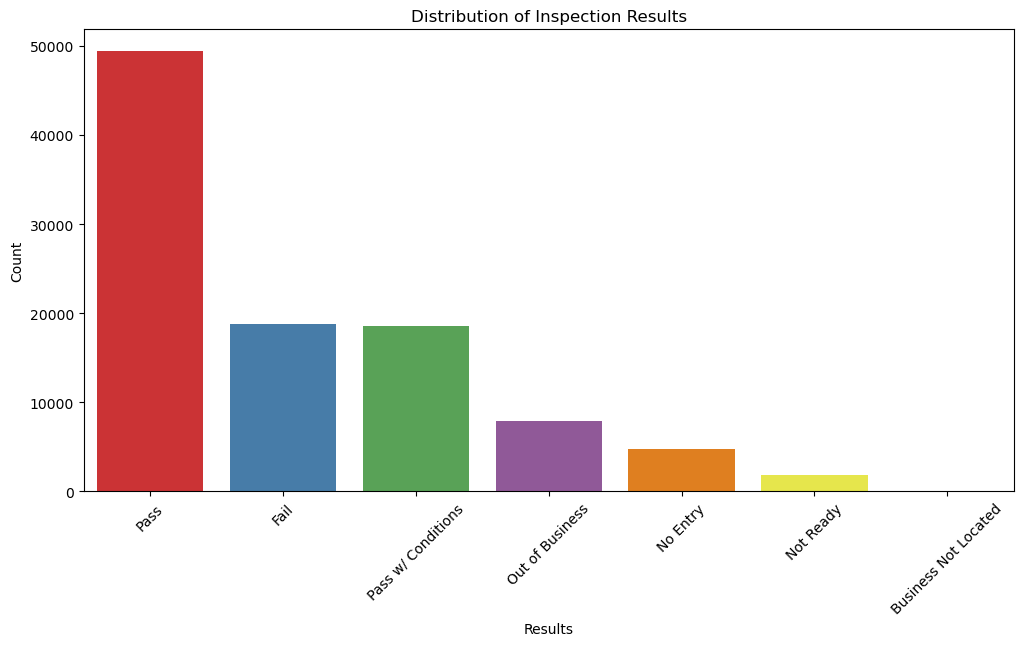

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
from matplotlib.colors import LinearSegmentedColormap

# Suppress warnings and scientific notation for clarity
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# Sample Data Creation (Use your actual data here)
# Load your data using pandas
df = pd.read_csv("updated_food_inspection_cleaned.csv")

# Basic data cleaning
df = df.dropna(subset=['Latitude', 'Longitude'])  # Drop rows with missing coordinates



# Visualization: Distribution of Inspection Results
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Results', palette='Set1', order=df['Results'].value_counts().index)
plt.title('Distribution of Inspection Results')
plt.xlabel('Results')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Geospatial Visualization using GeoPandas
# Convert Latitude and Longitude into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load a base map using geodatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))



# Customize the color palette using RColorBrewer equivalent in Python
# Create a custom colormap similar to RColorBrewer's palettes
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99']
cmap = LinearSegmentedColormap.from_list('custom_brewer', colors)

# Extract the colors from the colormap
palette_colors = [cmap(i / len(colors)) for i in range(len(colors))]



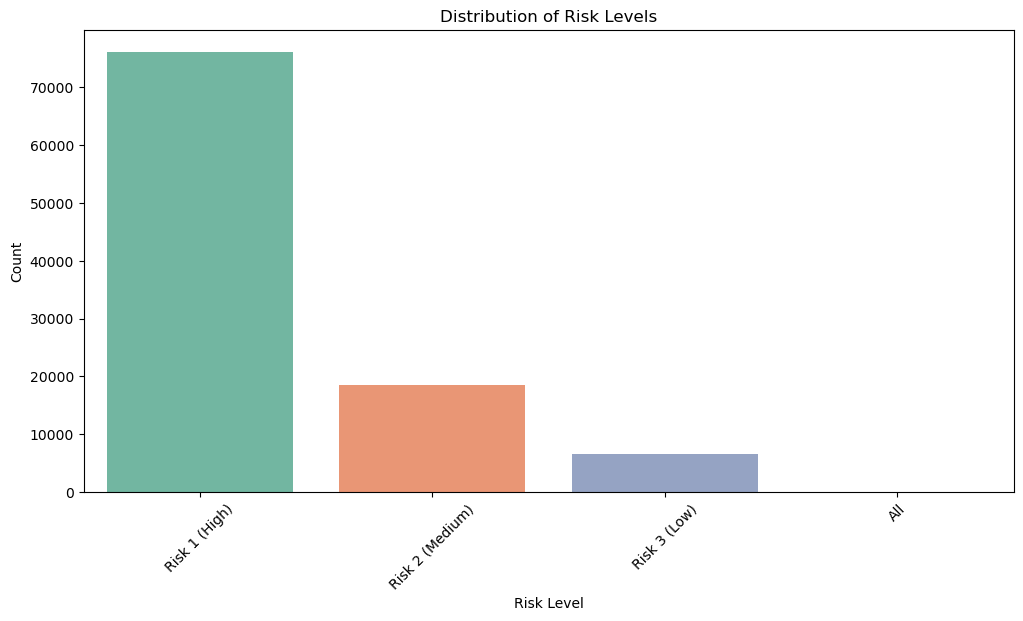

In [10]:
# Visualization: Distribution of Risk Levels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Risk', palette='Set2', order=df['Risk'].value_counts().index)
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

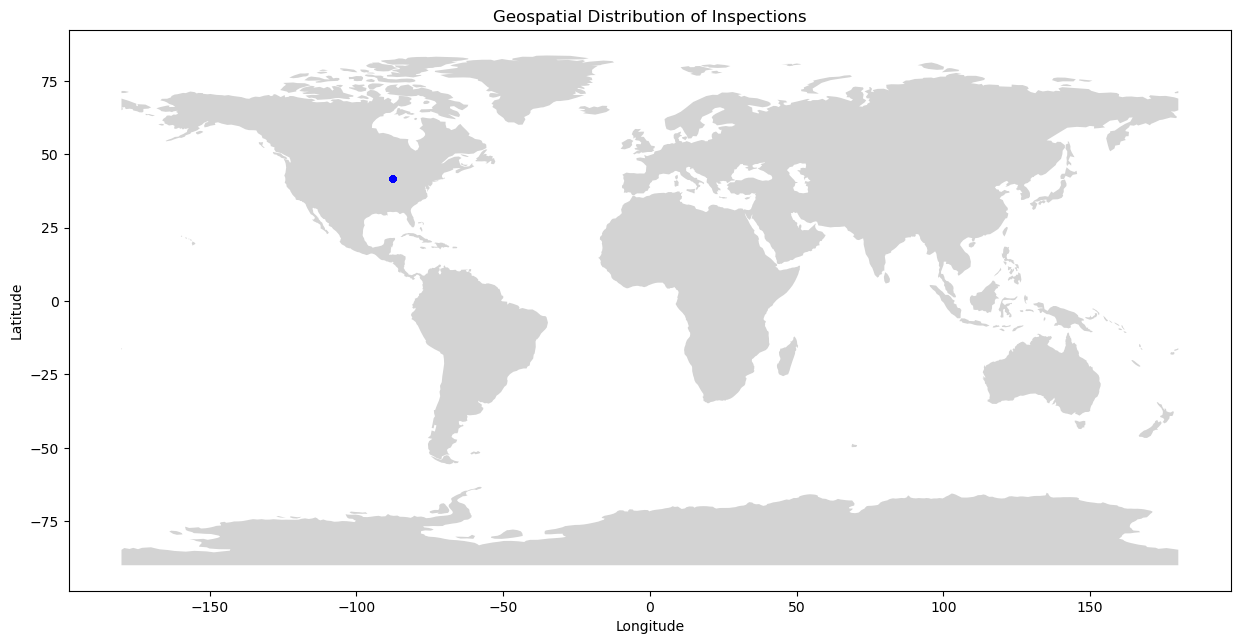

In [11]:
# Plotting the inspection points on the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, marker='o', color='blue', markersize=10, alpha=0.5)
plt.title('Geospatial Distribution of Inspections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

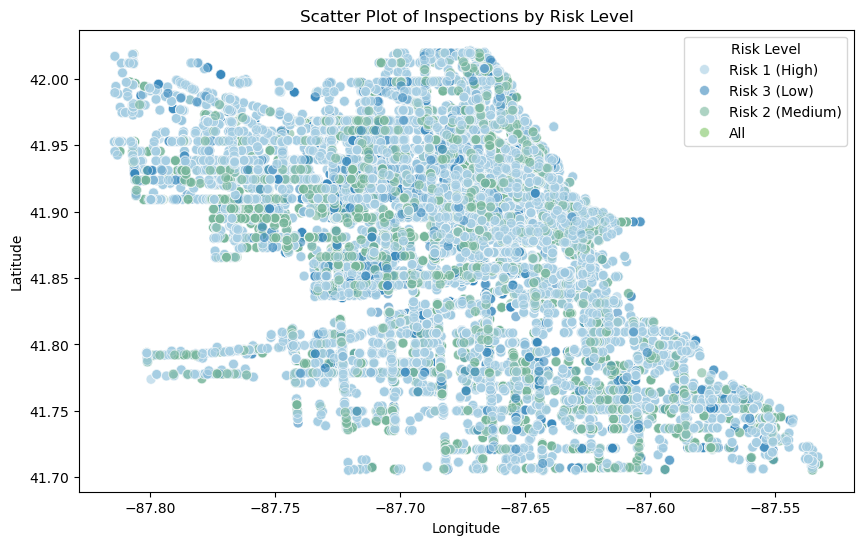

In [12]:
# Plot a custom styled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdf, x='Longitude', y='Latitude', hue='Risk', palette=palette_colors, s=50, alpha=0.6)
plt.title('Scatter Plot of Inspections by Risk Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Risk Level', loc='upper right')
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = 'updated_food_inspection_cleaned.csv'
data = pd.read_csv(file_path)


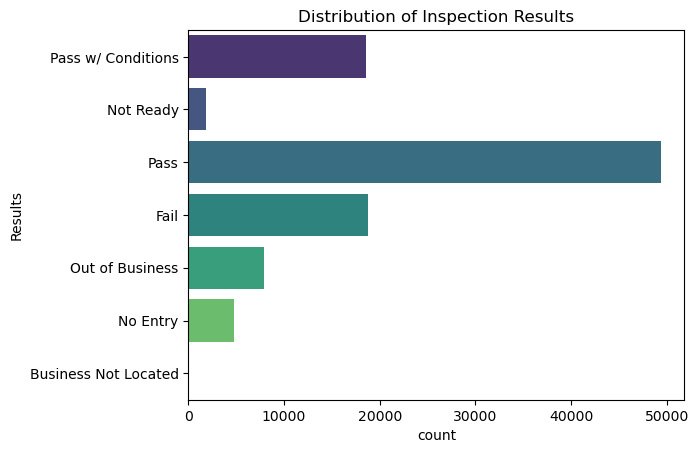

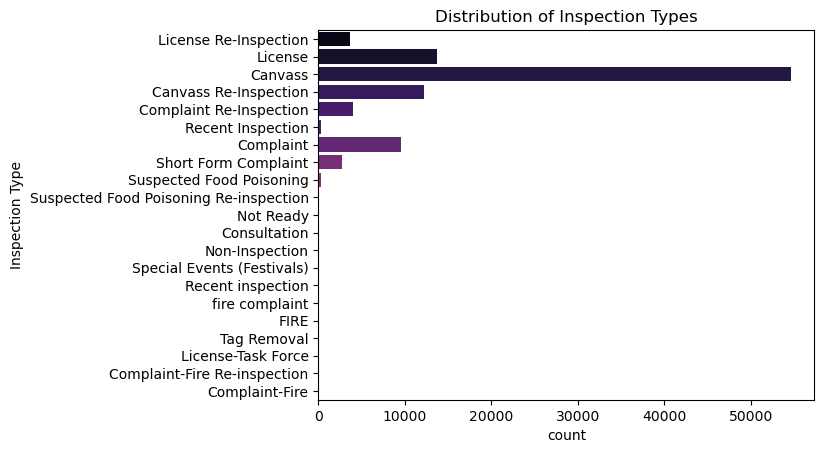

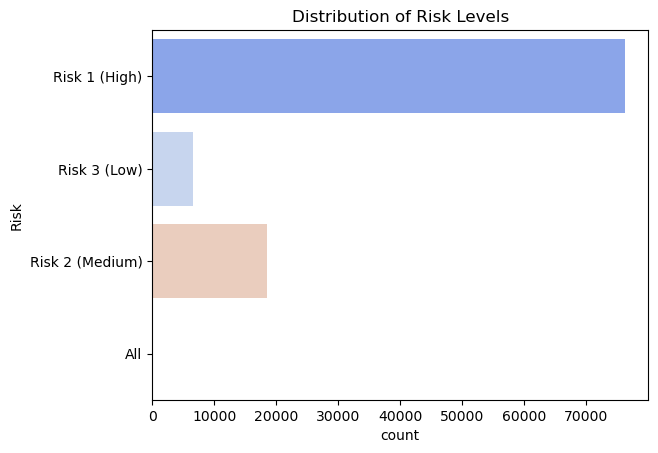

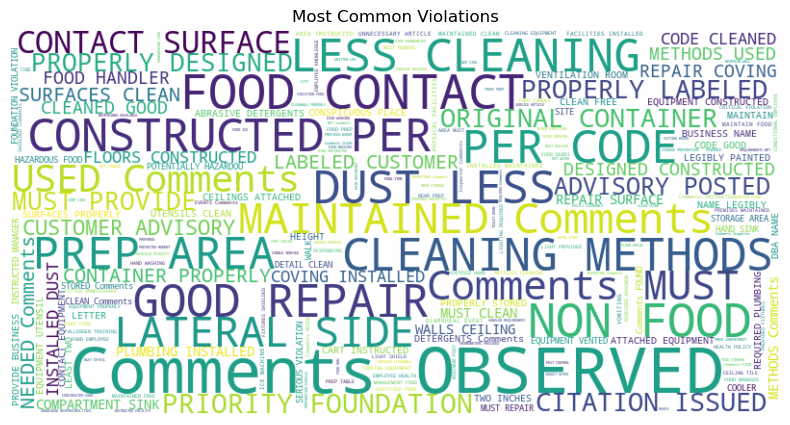

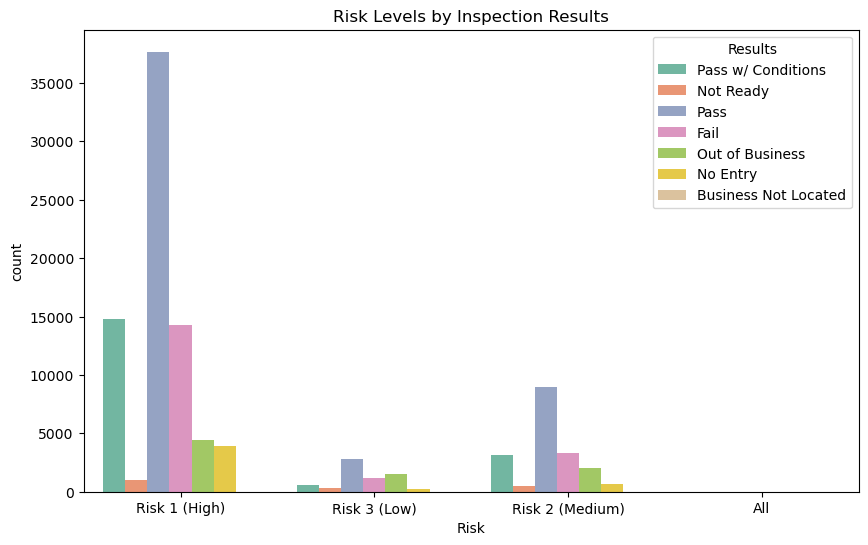

In [14]:
# Distribution of Inspection Results
sns.countplot(y=data['Results'], palette="viridis")
plt.title('Distribution of Inspection Results')
plt.show()

# Inspection Types Distribution
sns.countplot(y=data['Inspection Type'], palette="magma")
plt.title('Distribution of Inspection Types')
plt.show()

# Risk Levels
sns.countplot(y=data['Risk'], palette="coolwarm")
plt.title('Distribution of Risk Levels')
plt.show()

# Violations Heatmap (word frequency in Violations column)
from wordcloud import WordCloud
text = " ".join(data['Violations'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Violations')
plt.show()

# Risk vs Inspection Results
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Risk', hue='Results', palette="Set2")
plt.title('Risk Levels by Inspection Results')
plt.show()



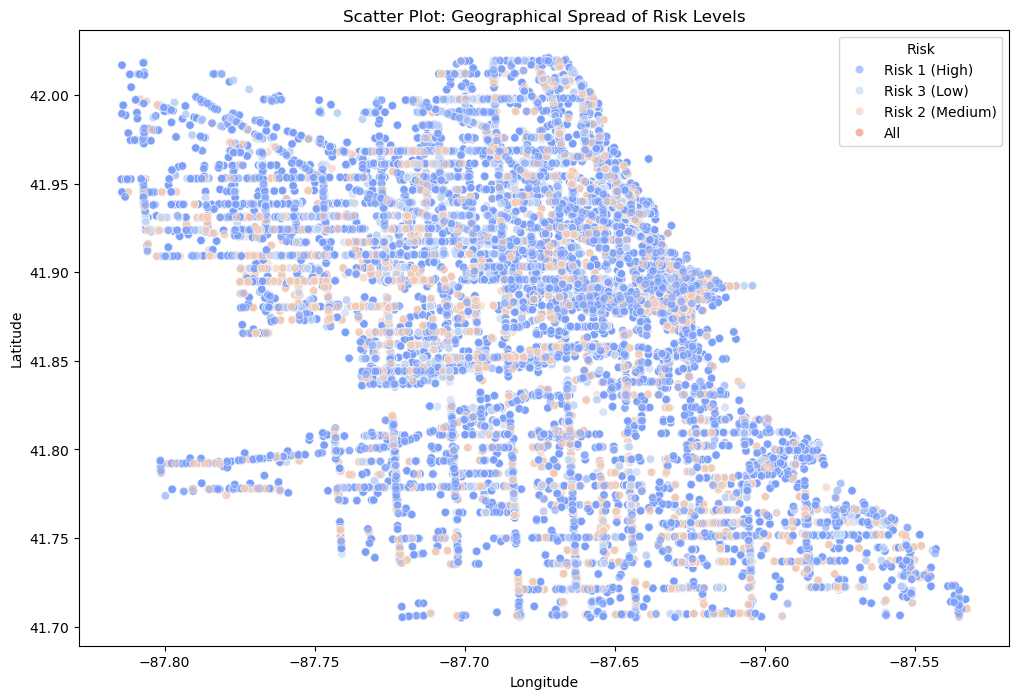

In [15]:
# Scatter plot for Latitude vs Longitude colored by Risk
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Risk', alpha=0.6, palette='coolwarm')
plt.title('Scatter Plot: Geographical Spread of Risk Levels')
plt.show()


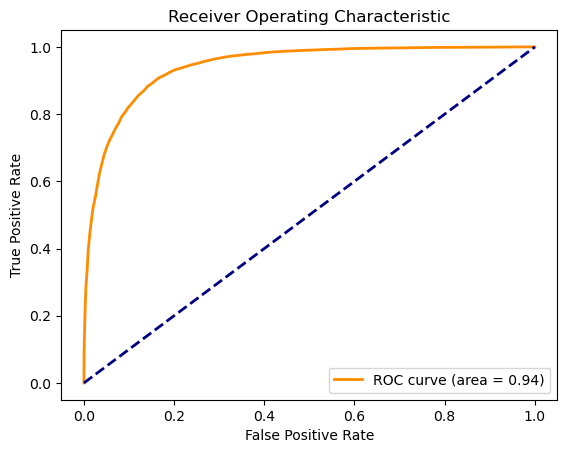

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Binary encoding Risk
data['Risk_binary'] = data['Risk'].apply(lambda x: 1 if x == 'Risk 1 (High)' else 0)
X = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Risk_binary'])
y = data['Risk_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


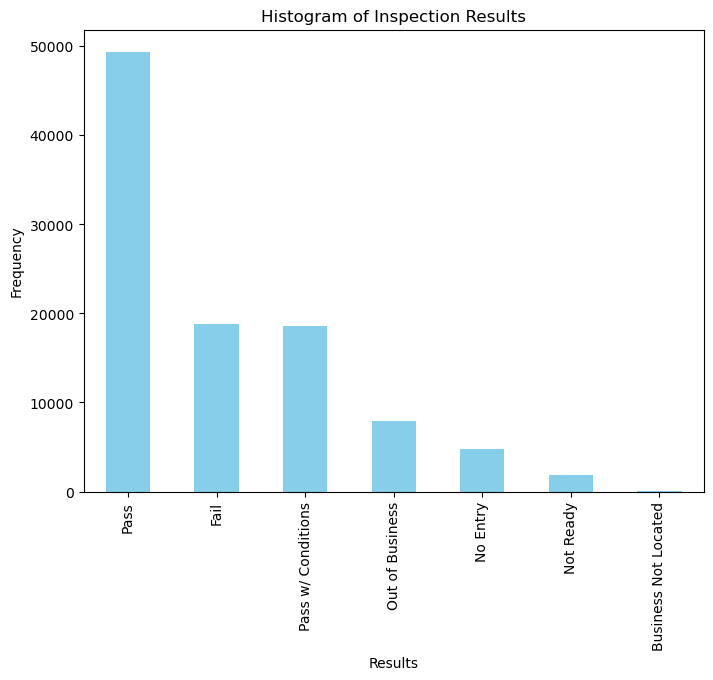

In [17]:
# Histogram of Inspection Results
data['Results'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Histogram of Inspection Results')
plt.xlabel('Results')
plt.ylabel('Frequency')
plt.show()


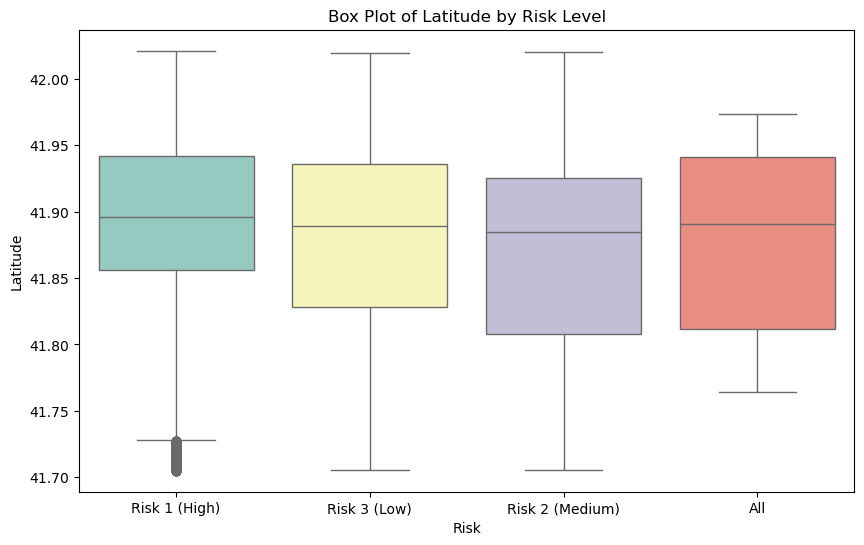

In [18]:
# Box plot of Latitude for each Risk Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Risk', y='Latitude', palette="Set3")
plt.title('Box Plot of Latitude by Risk Level')
plt.show()


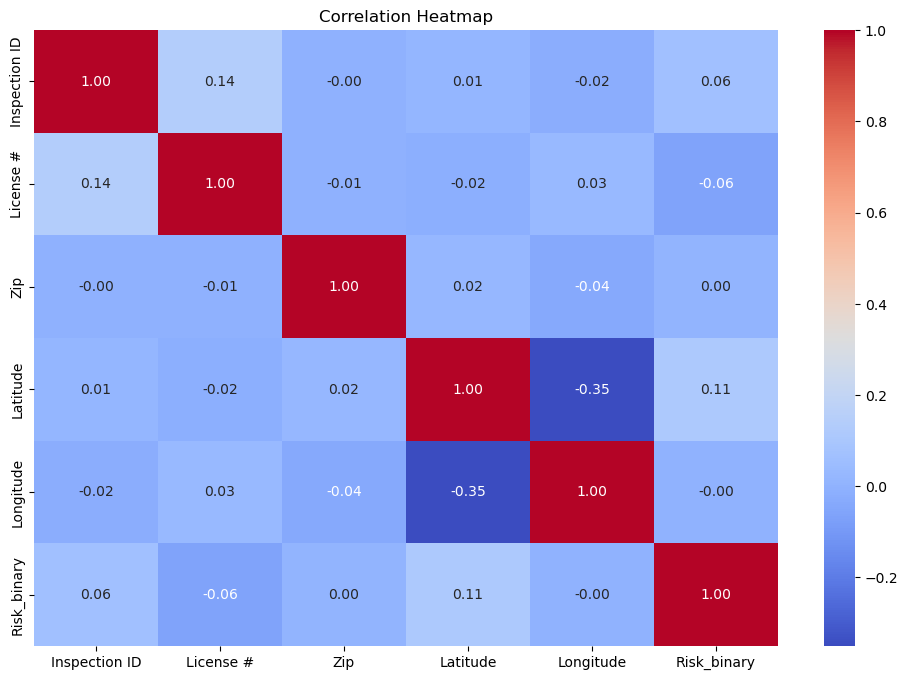

In [19]:
# Correlation Heatmap for numeric features
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


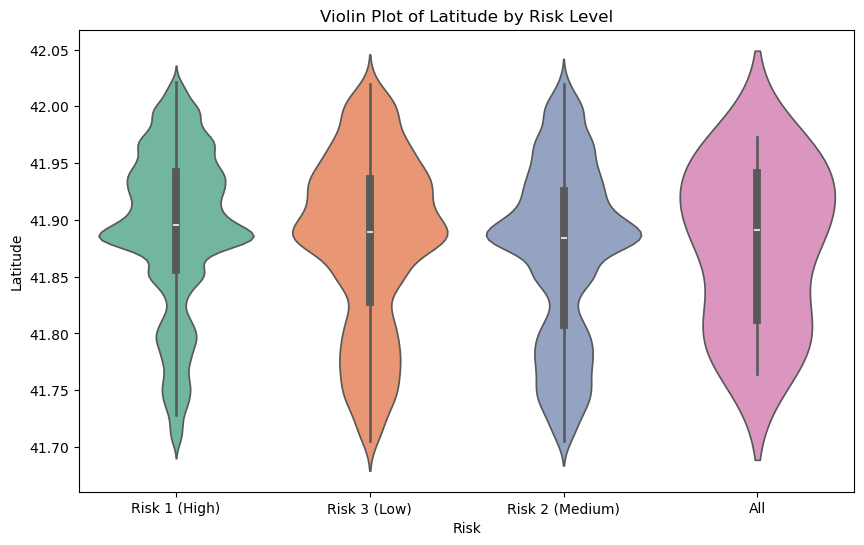

In [20]:
# Violin plot of Latitude by Risk
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Risk', y='Latitude', palette="Set2")
plt.title('Violin Plot of Latitude by Risk Level')
plt.show()


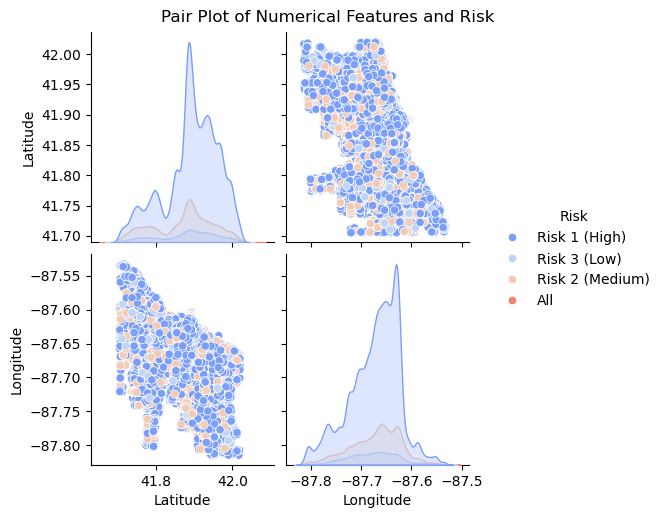

In [29]:
# Select only numeric columns for the pair plot
numerical_features = ['Latitude', 'Longitude']
cleaned_data = data[numerical_features + ['Risk']].dropna()

# Pair plot with Risk as the hue
sns.pairplot(data=cleaned_data, vars=numerical_features, hue='Risk', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features and Risk', y=1.02)
plt.show()


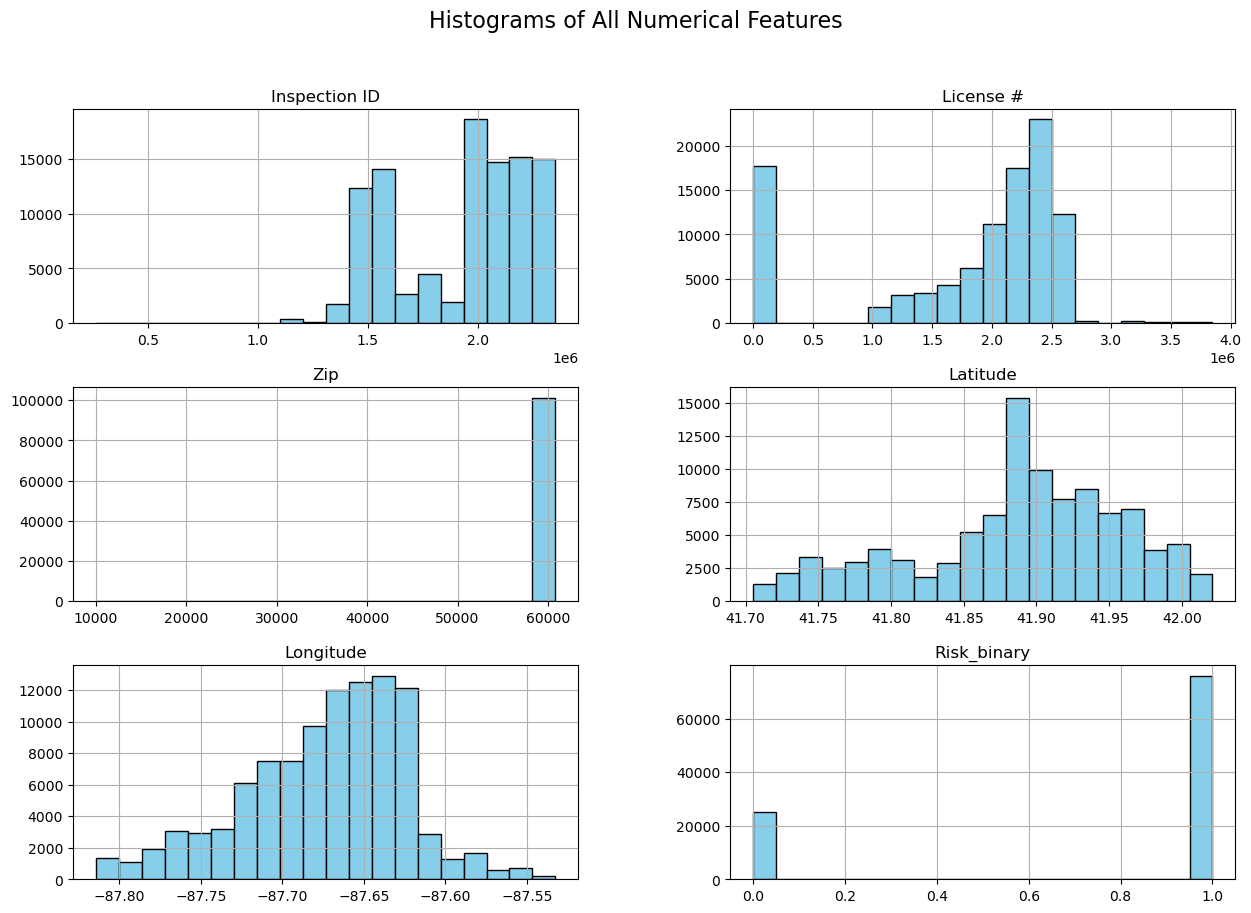

In [31]:
# Plot histograms for all numerical features in the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each numerical column
data[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', fontsize=16)
plt.show()


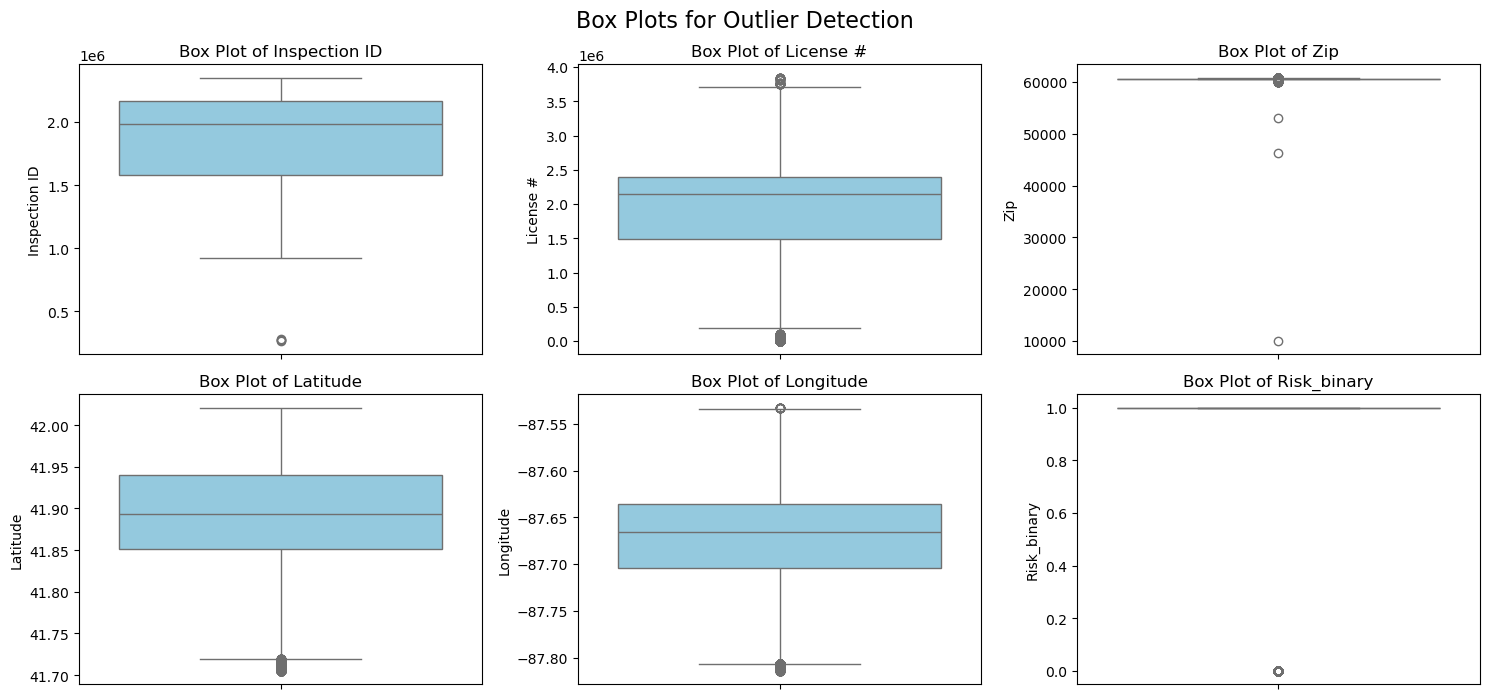

In [33]:
# Create box plots for all numerical features to detect outliers
plt.figure(figsize=(15, 10))

# Generate a boxplot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of features
    sns.boxplot(data=data, y=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, y=1.02)
plt.show()


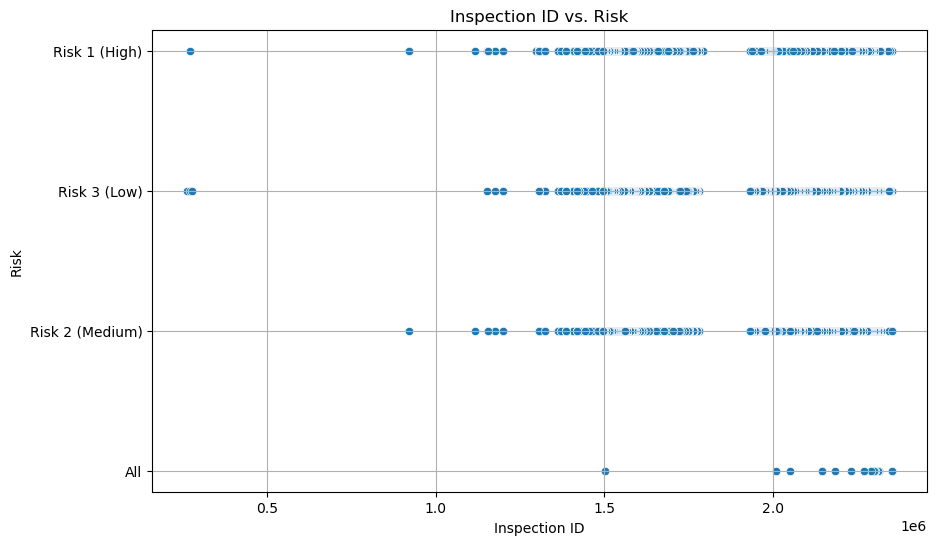

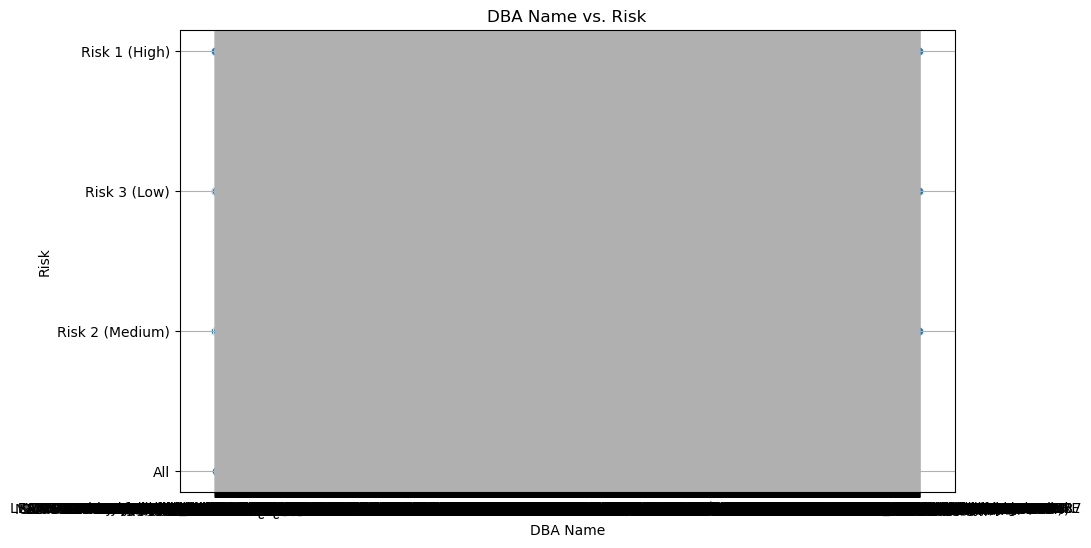

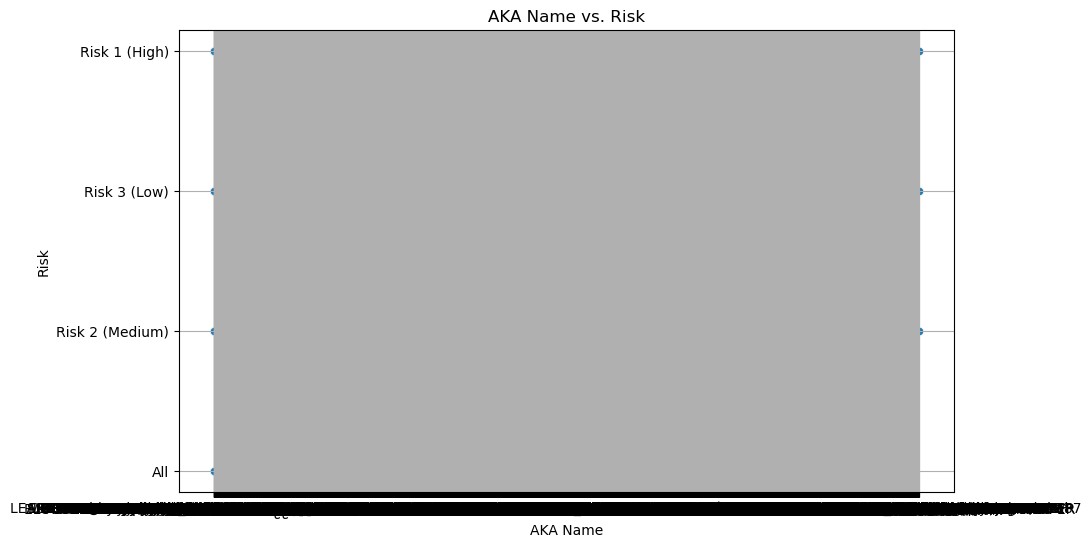

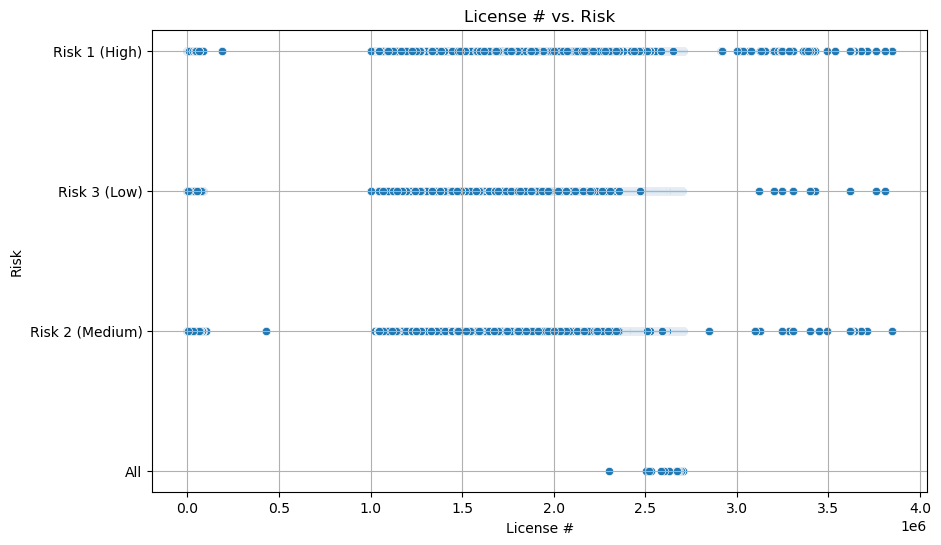

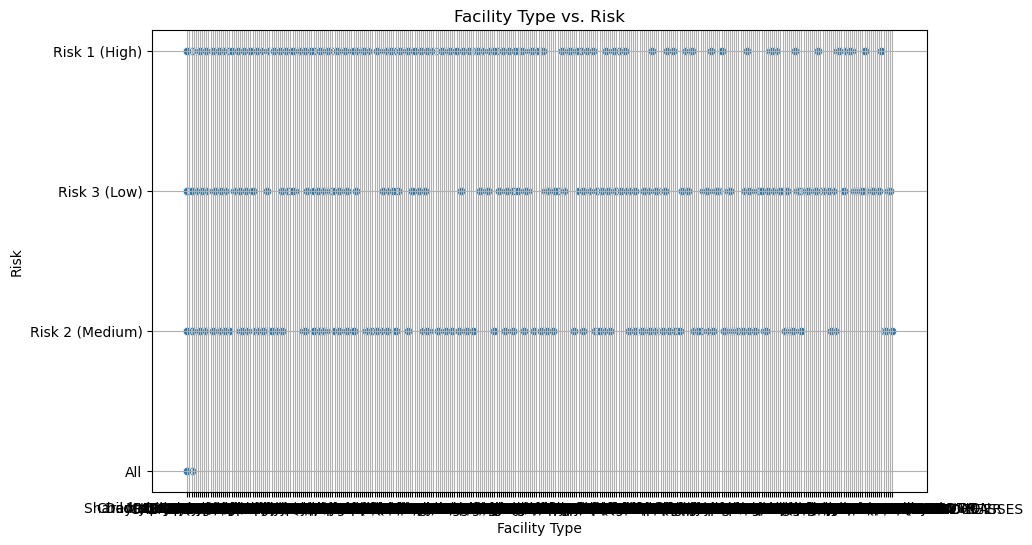

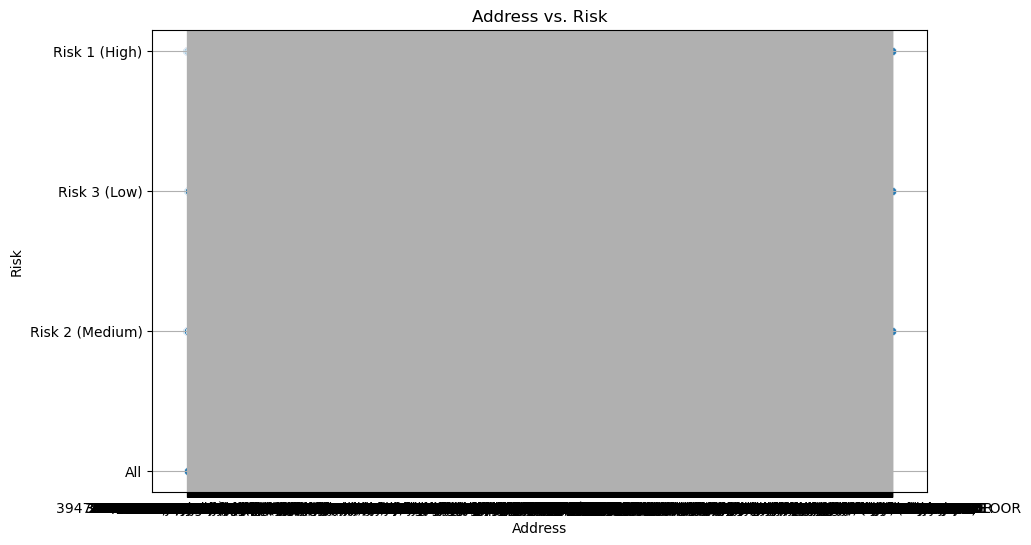

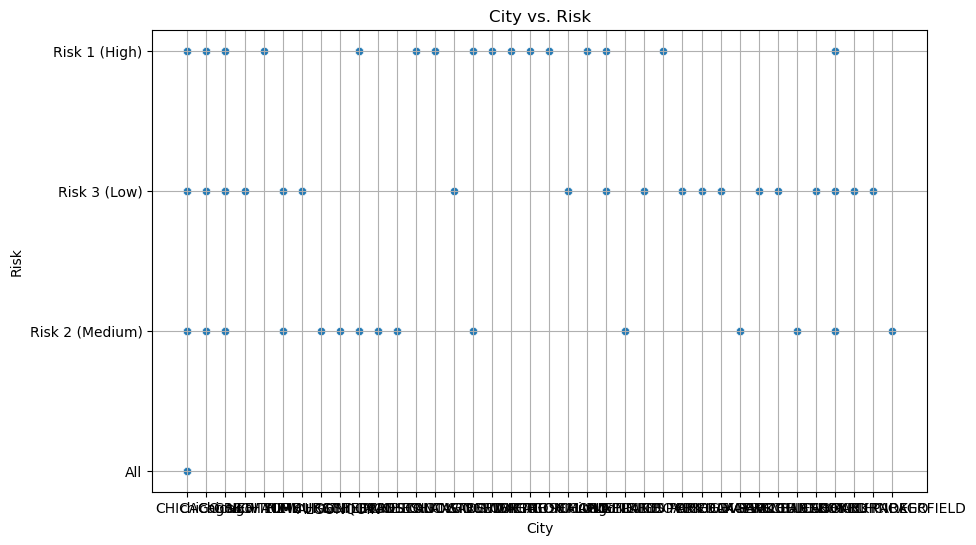

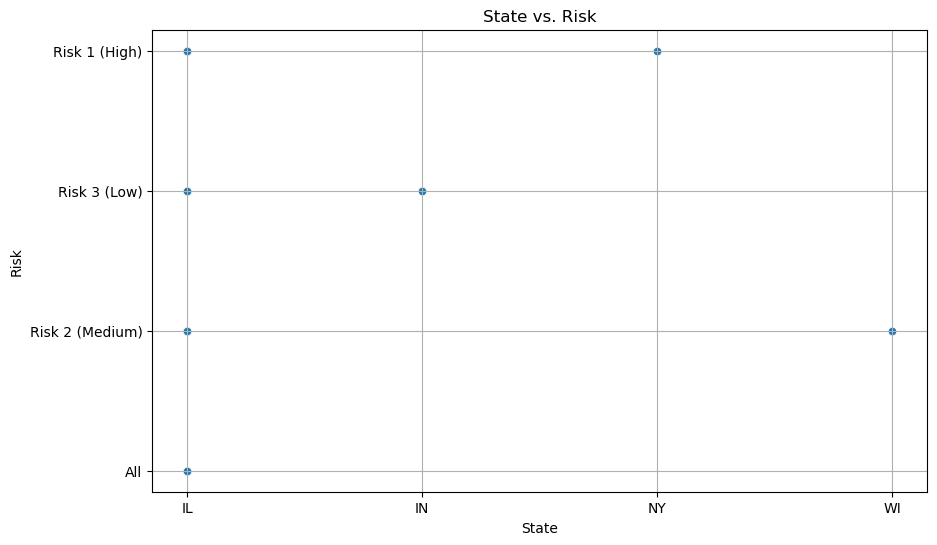

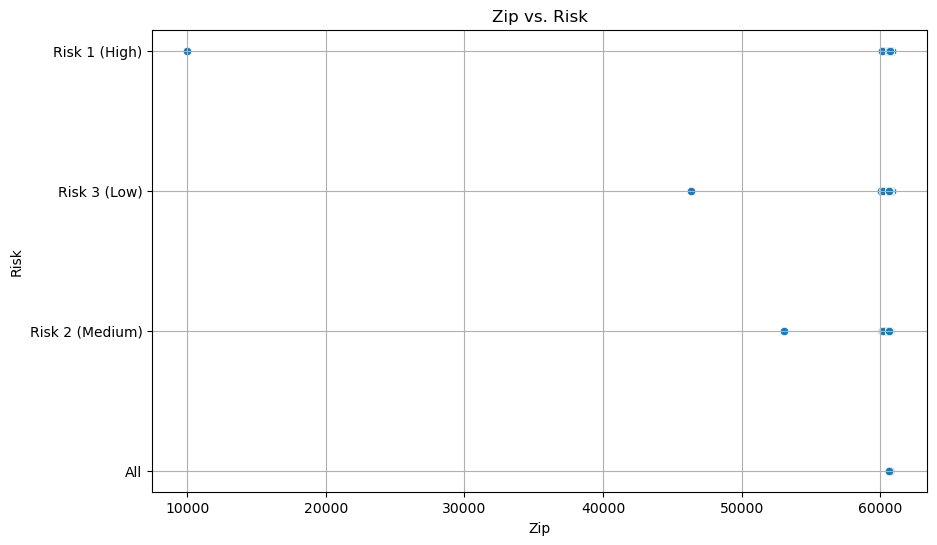

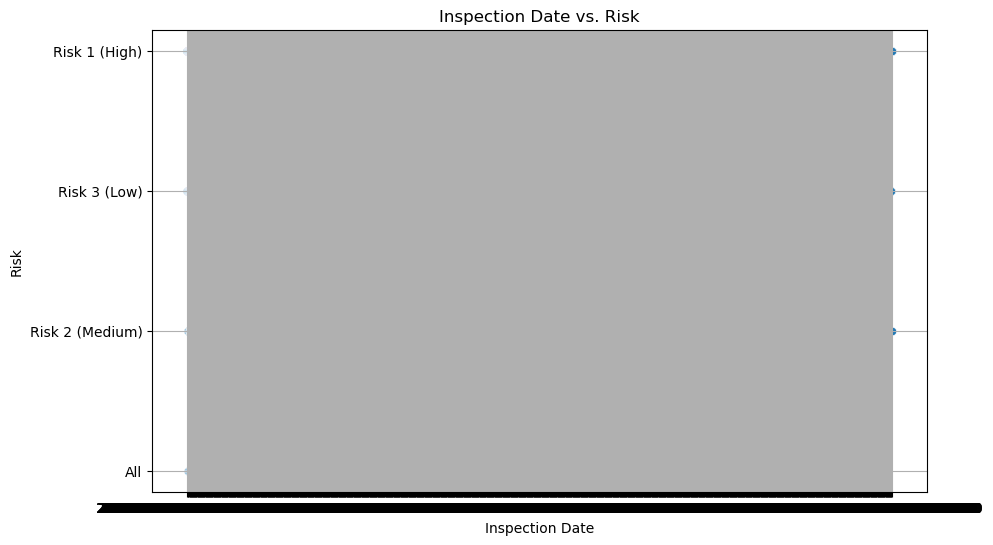

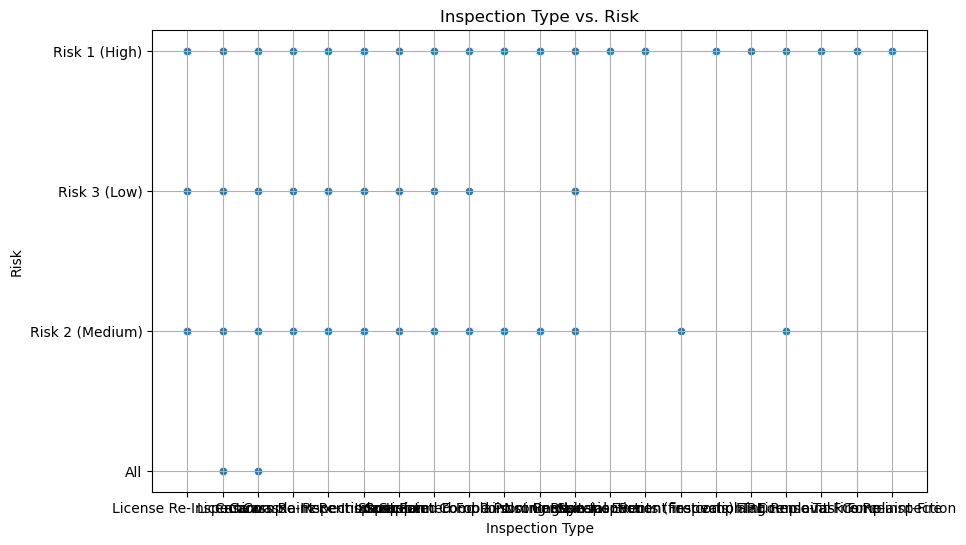

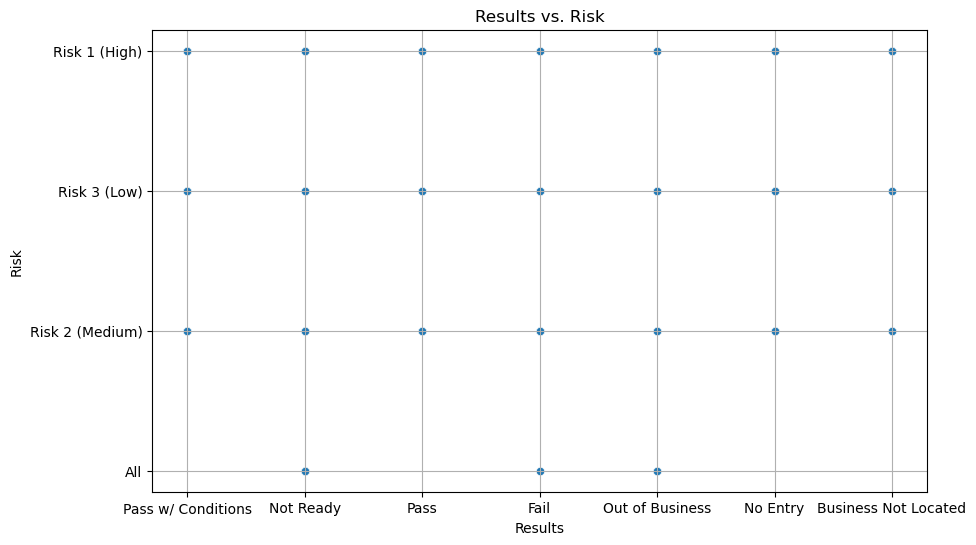

ValueError: 
2. CITY OF CHICAGO FOOD SERVICE SANITATION CERTIFICATE - Comments: OBSERVED NO CITY OF CHICAGO CERTIFIED FOOD MANAGER PRESENT WHILE TCS FOODS (SOUP AT 156.9F) WERE BEING PREPARED AND SERVED.  MANAGEMENT INSTRUCTED TO HAVE A CERTIFIED FOOD MANAGER PRESENT AT ALL TIMES WHILE TCS FOODS ARE BEING PREPARED AND SERVED.  CERTIFIED FOOD MANAGER ARRIVED AT APPROXIMATELY 9:55AM.  PRIORITY FOUNDATION 7-38-012.  CITATION ISSUED. | 3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: OBSERVED NO WRITTEN EMPLOYEE HEALTH POLICY ON THE PREMISES.  MANAGEMENT INSTRUCTED TO PROVIDE A SIGNED EMPLOYEE HEALTH POLICY FOR EACH EMPLOYEE.  PRIORITY FOUNDATION 7-38-010.  NO CITATION ISSUED. | 5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: OBSERVED NO CLEAN UP PROCEDURE OR SUPPLIES ON THE PREMISES TO RESPOND TO VOMIT AND DIARRHEAL EVENTS.  MANAGEMENT INSTRUCTED TO PROVIDE BOTH.  PRIORITY FOUNDATION 7-38-005.  NO CITATION ISSUED. | 21. PROPER HOT HOLDING TEMPERATURES - Comments: OBSERVED MEATBALLS AT 61.9F AND CHICKEN AT 92.1F INSIDE OF THE HOT HOLDING UNIT.  MANAGEMENT VOLUNTARILY DISCARDED APPROXIMATELY 5# OF FOOD WORTH $20.  PRIORITY 7-38-005.  CITATION ISSUED. | 22. PROPER COLD HOLDING TEMPERATURES - Comments: OBSERVED IMPROPER COLD HOLDING TEMPERATURES OF TCS FOODS.  OBSERVED THE FOLLOWING FOODS AT IMPROPER TEMPERATURES: TUNA AT 45.3F, AND EGG WHITES AT 58.3F.  MANAGEMENT VOLUNTARILY DISCARDED APPROXIMATELY 2# OF FOOD WORTH $5.  PRIORITY 7-38-005.  SEE VIOLATION #21 ABOVE FOR CITATION. | 23. PROPER DATE MARKING AND DISPOSITION - Comments: OBSERVED READY-TO-EAT, TCS FOODS HELD OVER 24 HOURS NOT DATE MARKED TO INDICATE THE DATE IN WHICH THE FOOD MUST BE CONSUMED OR DISCARDED.  MANAGEMENT INSTRUCTED TO DATE MARK ALL APPLICABLE FOODS.  PRIORITY FOUNDATION 7-38-005.  NO CITATION ISSUED. | 57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING - Comments: OBSERVED SEVERAL FOOD HANDLING EMPLOYEES WITHOUT A FOOD HANDLER CERTIFICATE.  MANAGEMENT INSTRUCTED TO SHOW PROOF OF TRAINING FOR ALL EMPLOYEES. | 58. ALLERGEN TRAINING AS REQUIRED - Comments: OBSERVED THE CERTIFIED FOOD MANAGER WITHOUT AN ALLERGEN TRAINING CERTIFICATE.  MANAGEMENT INSTRUCTED THAT ALL CERTIFIED FOOD MANAGERS MUST OBTAIN THIS CERTIFICATION.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ^
ParseException: Expected end of text, found '$'  (at char 1194), (line:1, col:1195)

<Figure size 1000x600 with 1 Axes>

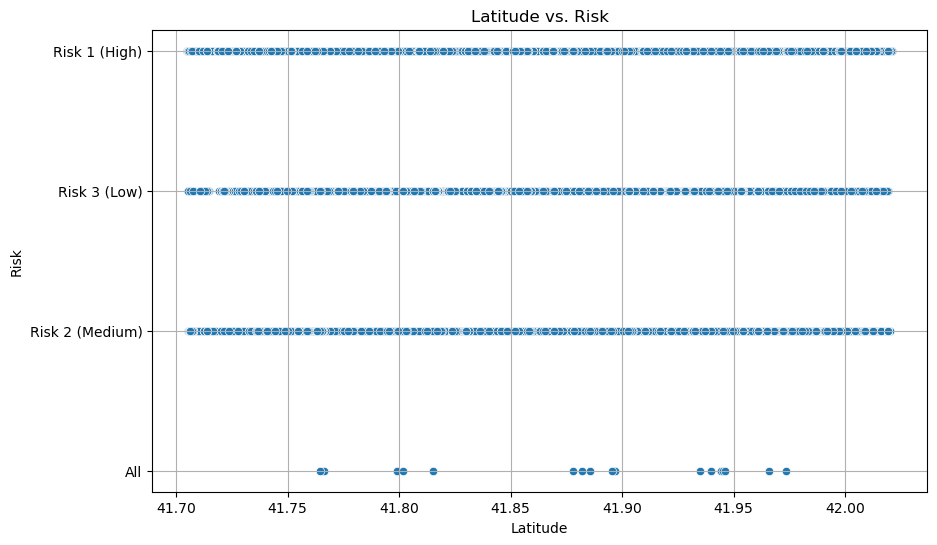

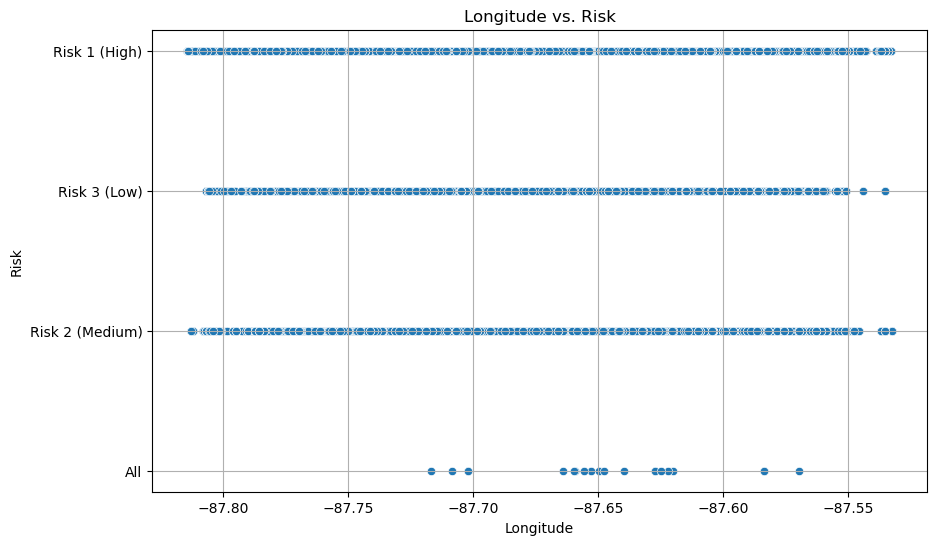

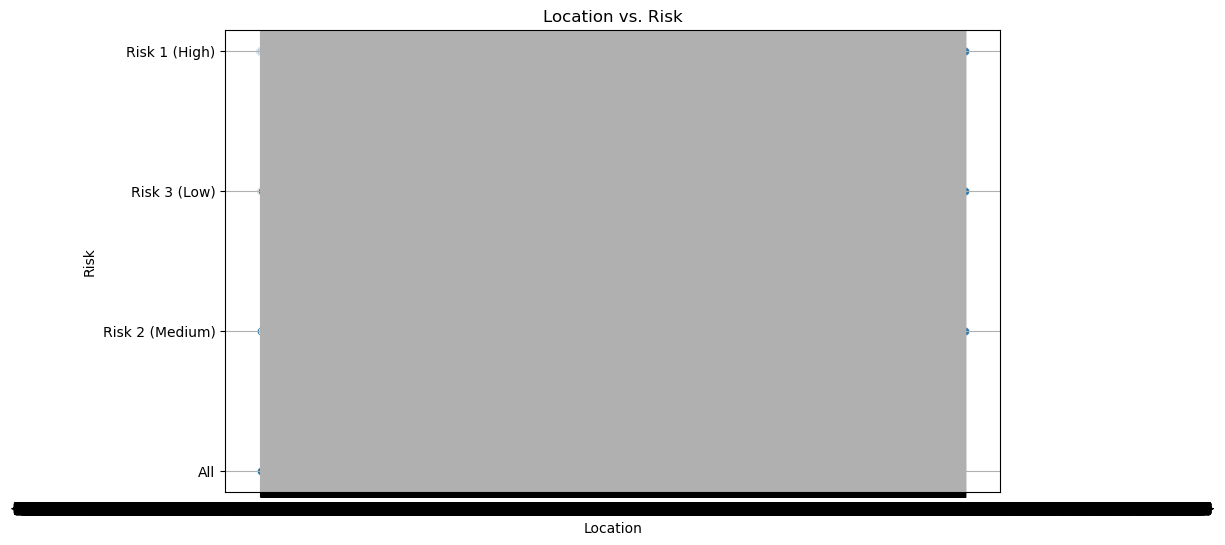

In [35]:
# 8. Feature vs. Target (Flood Probability) Plots
# For all features individually against the target variable
for feature in df.columns[:-1]:  # Assuming 'Flood Probability' is the last column
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['Risk'])
    plt.title(f'{feature} vs. Risk')
    plt.xlabel(feature)
    plt.ylabel('Risk')
    plt.grid(True)
    plt.show()
